<img src=https://kto-ozvuchival.ru/wp-content/uploads/2017/12/kto-ozvuchivaet-toni-starka-na-russkom-800x500.jpg><br><hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>

Спасибо за проделанную работу🤝

Александр, всё принято + оставил дополнительные комментарии. Желаю дальнейших успехов и отличного настроения! Рекомендую хороший гайд по временным рядам <a href="https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide">Kaggle TimeSeries Guide</a>

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Александр, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать классным специалистом

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    


   
Поехали! :)

<hr style="border: 2px solid green;" />

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Финальный-комментарий" data-toc-modified-id="Финальный-комментарий-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><span style="color: green">Финальный комментарий<span></span></span></a></span></li><li><span><a href="#Комментарий-ревьювера" data-toc-modified-id="Комментарий-ревьювера-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Комментарий ревьювера</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Common-comments" data-toc-modified-id="Common-comments-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Common comments<br></a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as RMSE
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [2]:
try:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
RS = 1
VERBOSE = 1
CV = 3

In [4]:
data.sort_index(inplace=True)
data.info()
print(f'\nКоличество пропусков:\n{data.isna().sum()}')
print(f'\nПолных дубликатов:{data.shape[0] - data.index.nunique()}')
print(f'{data.index.is_monotonic=}')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

Количество пропусков:
num_orders    0
dtype: int64

Полных дубликатов:0
data.index.is_monotonic=True


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Required for improvement - ⛔️</b><br>Совместно с небольшим анализом данных было бы хорошо посмотреть на несколько первых\последних строк данных</div><br>

In [5]:
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Думал это излишне, т.к. следом выводится практически такая же таблица, с доп. столбцами.
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Всё ок👍</div> 

In [6]:
data = data.resample('1H').sum()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"><b>Excelent work - ✅</b><br>Данные ресемплированы корректно!</div> <br>

In [7]:
def make_features(*, train, test, lags, rolling_mean_size):
#     data['year'] = data.index.year
    test['month'] = test.index.month
    test['day'] = test.index.day
    test['dayofweek'] = test.index.dayofweek
    test['hour'] = test.index.hour
    for lag in lags:#range(1, max_lag + 1):
        tag='lag_{}'.format(lag)
        test[tag] = test['num_orders'].shift(lag).astype('Int64')
    data['rolling_mean_'+str(rolling_mean_size)] = data['num_orders'].shift(
        ).rolling(rolling_mean_size).mean()
make_features(train=data, test=data, lags=[1,2,3,4,5,6,24], rolling_mean_size=4)
data

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_24,rolling_mean_4
datetime,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2018-03-01 01:00:00,85,3,1,3,1,124,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2018-03-01 02:00:00,71,3,1,3,2,85,124,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2018-03-01 03:00:00,66,3,1,3,3,71,85,124,<NA>,<NA>,<NA>,<NA>,NaN
2018-03-01 04:00:00,43,3,1,3,4,66,71,85,124,<NA>,<NA>,<NA>,86.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,4,19,207,217,197,116,133,166,72,184.25
2018-08-31 20:00:00,154,8,31,4,20,136,207,217,197,116,133,142,189.25
2018-08-31 21:00:00,159,8,31,4,21,154,136,207,217,197,116,198,178.50


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Required for improvement - ⛔️</b><br> Подскажи, почему в качестве лагов выбран именно такой набор <code> [1,2,3,4,5,6,24] </code> (а например, не все лаги от 1 до 24), а в качестве размера окна скол среднего выбрано 4 часа🤔 </div><br>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Изначально в наборе лагов было [1,2,3,4,5,6]. 24 добавил после секции анализа, где явно виден 24-х часовой повтор.  
Размер окна изначально был равен 3-ке. Но несколько раз перезапустив блокнот (готовый) попробовал окна 3, 4, 5. На 4-ке были достигнуты лучшие результаты.  

Вопрос, как корректно описать то, что было сделано, т.к. по сути использовались выводы с более поздних стадий (т.е. работа выполнена в несколько итераций).
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br> Именно в этом и состоит нюанс: что это знание из последующего анализа. Создание признаков никак не влияет на сезонную декомпозицию, поэтому может быть выполнено после, но с учетом знания о сезонности (или любом другом анализе) - в таком случае работа будет иметь логичсескую последовательность</div> 

In [8]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"><b>Excelent work - ✅</b><br>Данные разделены корректно!</div> <br>

## Анализ

In [9]:
train = train.dropna()

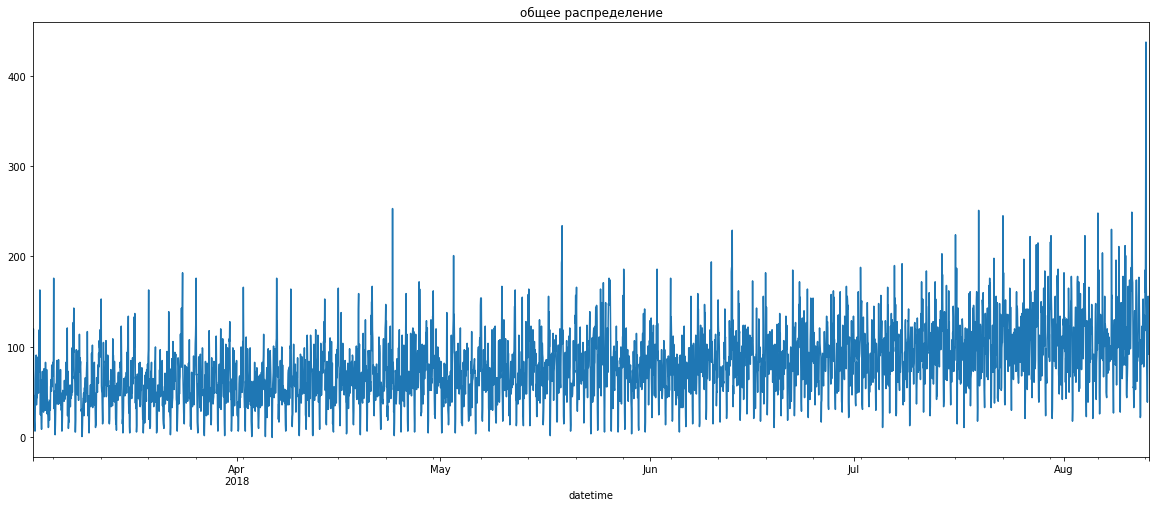

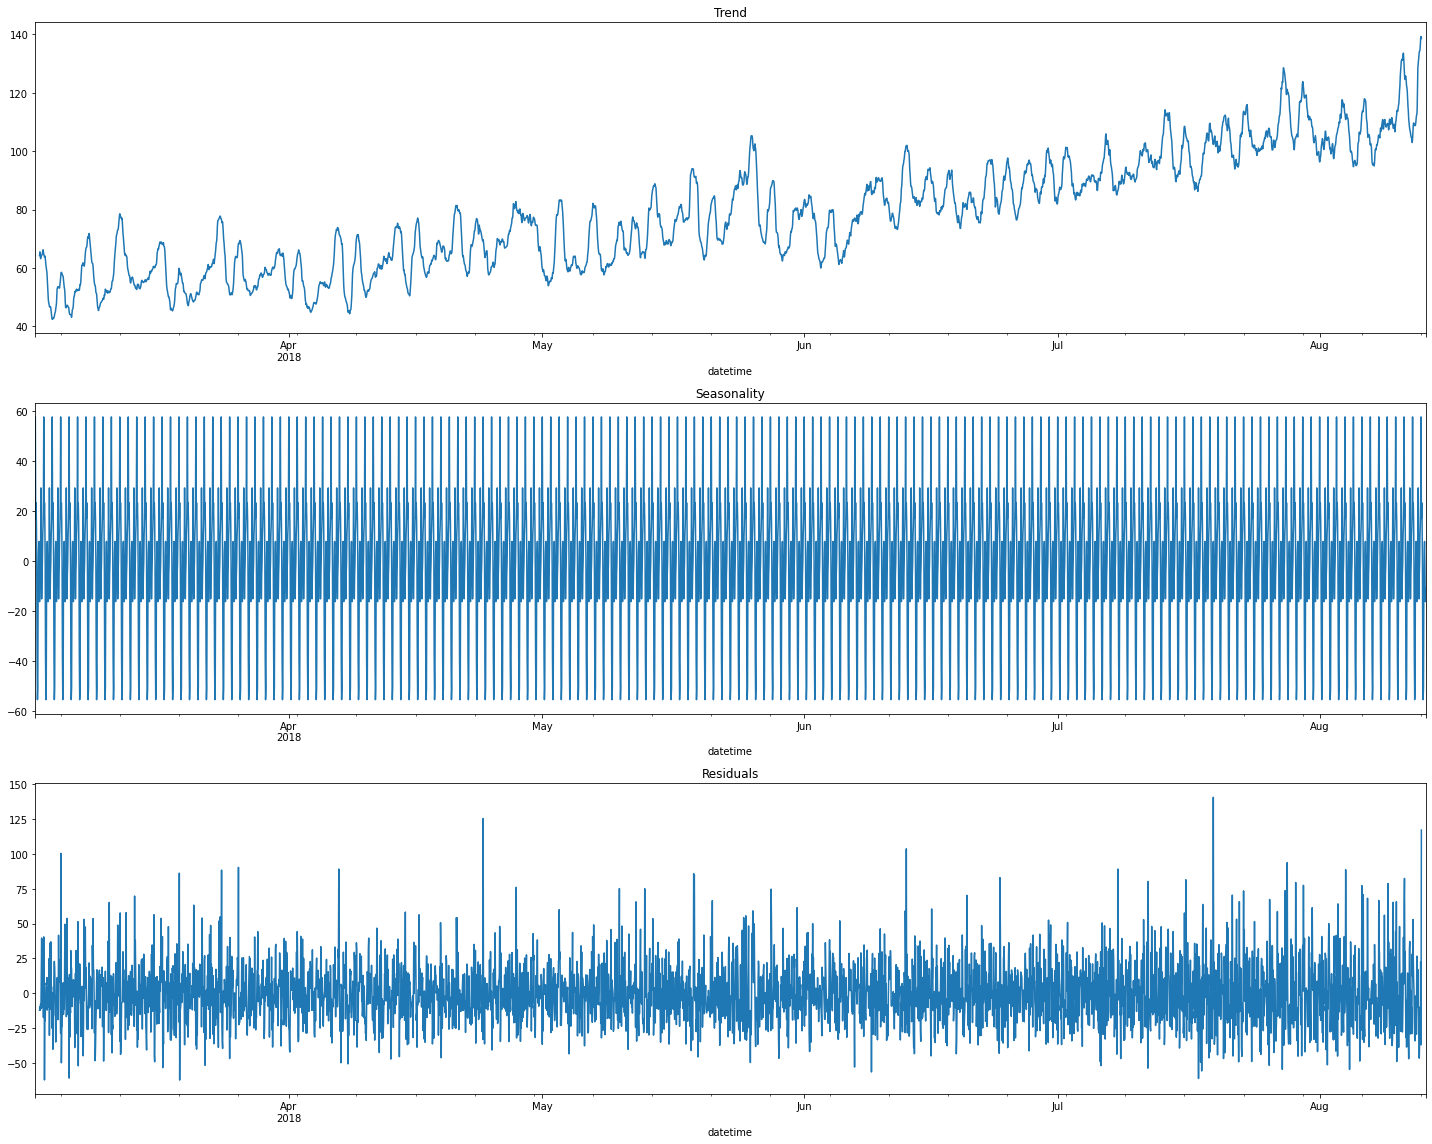

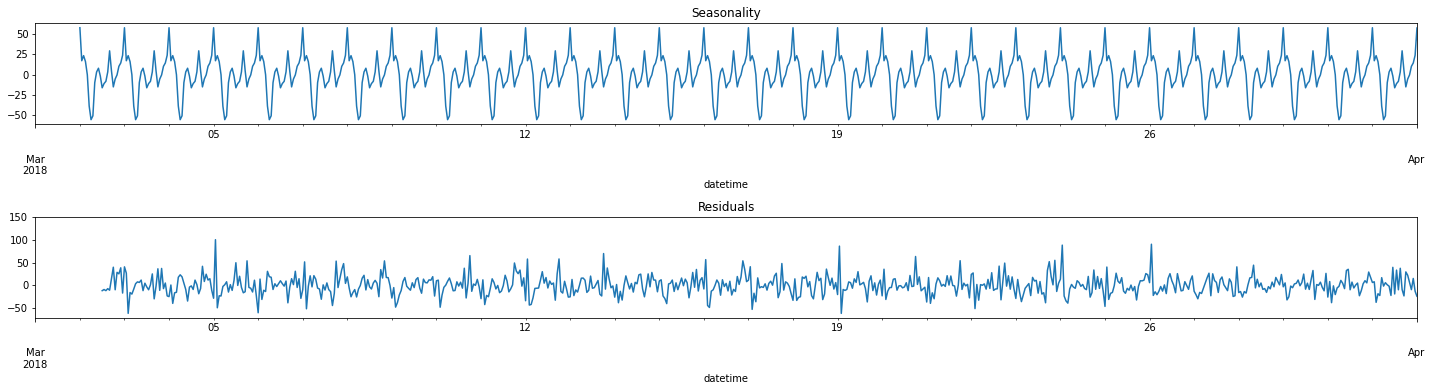

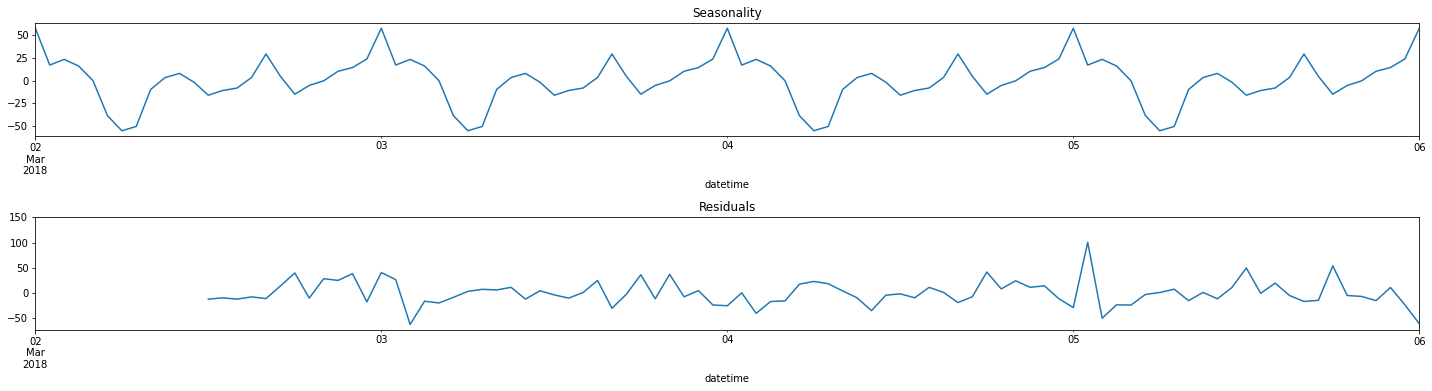

In [10]:
data_D = train['num_orders']#.resample('1D').sum()
decomposed = seasonal_decompose(data_D)
data_D.plot(figsize=(20, 8), title='общее распределение')

plt.figure(figsize=(20, 16))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

#decomposed = seasonal_decompose(train['2018-03':'2018-03']['num_orders']) #v1
decomposed = seasonal_decompose(train['num_orders']) #v2
plt.figure(figsize=(20, 8))
# plt.subplot(311)
# decomposed.trend.plot(ax=plt.gca())
#plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlim(['2018-03','2018-04']) #v2
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.xlim(['2018-03','2018-04']) #v2
plt.tight_layout()

#decomposed = seasonal_decompose(train['2018-03-01':'2018-03-05']['num_orders']) #v1
decomposed = seasonal_decompose(train['num_orders']) #v2
plt.figure(figsize=(20, 8))
# plt.subplot(311)
# decomposed.trend.plot(ax=plt.gca())
#plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlim(['2018-03-02','2018-03-06']) #v2
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.xlim(['2018-03-02','2018-03-06']) #v2
plt.tight_layout()

Наблюдается ярко выраженная суточная зависимость.



<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Required for improvement - ⛔️</b><br> При выборе другого временного периода <code> decomposed = seasonal_decompose(train['2018-03':'2018-03']['num_orders']) </code> ты снова выполняешь декомпозицию, это изменяет её результаты, тк данных становится меньше. Корректный вариант: декомпозиция выполняется на всех данных, а уже при визуализации берется определенный период (неделя, месяц и тд.) </div><br>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Поправил
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Всё ок👍</div> 

## Обучение

In [11]:
col_transformer = ColumnTransformer(transformers=[('num_preproc', StandardScaler(), 
                    [x for x in data.columns if x != 'num_orders' ]) ])
result = pd.DataFrame(columns=['label', 'best_param', 'rmse', 'best_model'])
RMSE=lambda x,y: MSE(x, y, squared=False)
score_RMSE = make_scorer(RMSE, greater_is_better=False)

In [12]:
def get_metrics(*, param_grid, model, label, train):
    tscv = TimeSeriesSplit(n_splits=2)
    if (model != DummyRegressor) and (model != LinearRegression):
        pipeline_current = Pipeline(steps = [('preprocessor', col_transformer),
                                         ('regressor', model(random_state=RS) )])
    else:
        pipeline_current = Pipeline(steps = [('preprocessor', col_transformer),
                                         ('regressor', model() )])
    #model_current = GridSearchCV(pipeline_current, verbose=VERBOSE, param_grid=param_grid, cv=CV,
    model_current = GridSearchCV(pipeline_current, verbose=VERBOSE, param_grid=param_grid, cv=tscv,
        refit=True, error_score = 'raise', scoring=score_RMSE)    
    model_current.fit(train.drop('num_orders', axis=1), train.num_orders)
    exist_hyper=[]
    for i in list(model_current.get_params().keys()):
        if 'estimator__regressor__' in i: exist_hyper.append(i.replace('estimator__regressor__', '')) #v1
        #exist_hyper.append(i) #v2
    display(f"доступные гиперпараметры: {exist_hyper}")
    display(f'Лучшие гиперпараметры: {model_current.best_params_}')
    display(f'Лучшее значение RMSE: {- model_current.best_score_}')
    return pd.Series({'label':label, 'best_param': model_current.best_params_,
        'rmse': - model_current.best_score_,
        'best_model': model_current.best_estimator_})

In [13]:
result.loc[len(result)] = get_metrics(model=DecisionTreeRegressor,
            param_grid={
                'regressor__max_depth': list(range(10,15)),
                'regressor__min_samples_leaf': list(range(7, 15))},
            label='tree', train=train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


"доступные гиперпараметры: ['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']"

"Лучшие гиперпараметры: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 10}"

'Лучшее значение RMSE: 30.489146423971803'

In [14]:
result.loc[len(result)] = get_metrics(model=LinearRegression,
            #param_grid={'regressor__n_jobs': list(range(13,15))}, #v1
            param_grid={}, #v2
            label='LinearRegression', train=train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


"доступные гиперпараметры: ['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive']"

'Лучшие гиперпараметры: {}'

'Лучшее значение RMSE: 28.6751628102935'

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>What can be improve-⚠️</b><br> <code> _n_jobs </code> - параметр, не имеющий отношения к настройке ML модели - это кол-во ядер, которые будут задействованы при обучении. У простой линейной модели можно ничего не настраивать </div> <br>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Поправил
</div>

In [15]:
result.loc[len(result)] = get_metrics(model=DummyRegressor,
            #param_grid={}, #v1
            param_grid={'regressor__strategy': ['mean', 'median']}, #v2                
            label='DummyRegressor', train=train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


"доступные гиперпараметры: ['constant', 'quantile', 'strategy']"

"Лучшие гиперпараметры: {'regressor__strategy': 'mean'}"

'Лучшее значение RMSE: 44.55678723382292'

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Required for improvement - ⛔️</b><br> Подскажи, какая стратегия используется DummyRegressor?</div><br>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Из описания: `strategy{“mean”, “median”, “quantile”, “constant”}, default=”mean”`  
Т.е. тут используется среднее.
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Всё ок👍</div> 

In [16]:
result.loc[len(result)] = get_metrics(model=CatBoostRegressor,
            param_grid={},
            label='CatBoostRegressor', train=train)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Learning rate set to 0.042769
0:	learn: 29.7892193	total: 48.8ms	remaining: 48.8s
1:	learn: 29.2475934	total: 50.8ms	remaining: 25.3s
2:	learn: 28.7891391	total: 52.5ms	remaining: 17.4s
3:	learn: 28.2919871	total: 54ms	remaining: 13.5s
4:	learn: 27.8281600	total: 55.8ms	remaining: 11.1s
5:	learn: 27.3421551	total: 57.4ms	remaining: 9.5s
6:	learn: 26.8905657	total: 59.1ms	remaining: 8.38s
7:	learn: 26.4638429	total: 60.7ms	remaining: 7.52s
8:	learn: 26.0641015	total: 62.2ms	remaining: 6.85s
9:	learn: 25.6992755	total: 63.8ms	remaining: 6.32s
10:	learn: 25.3363960	total: 65.5ms	remaining: 5.89s
11:	learn: 24.9724306	total: 67.2ms	remaining: 5.53s
12:	learn: 24.6558013	total: 68.8ms	remaining: 5.22s
13:	learn: 24.3778116	total: 70.3ms	remaining: 4.95s
14:	learn: 24.1109772	total: 72.1ms	remaining: 4.73s
15:	learn: 23.8477906	total: 73.6ms	remaining: 4.53s
16:	learn: 23.5598194	total: 75.4ms	remaining: 4.36s
17:	learn: 23.2731514	t

"доступные гиперпараметры: ['loss_function', 'random_state']"

'Лучшие гиперпараметры: {}'

'Лучшее значение RMSE: 27.503875172821047'

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Required for improvement - ⛔️</b><br> Почему у бустинга ты решил не подбирать гиперпараметры?</div><br>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Согласно тому, что выдает `model_current.get_params().keys()` для CatBoostRegressor, там доступны только `"доступные гиперпараметры: ["loss_function", "random_state"]"`. Поэтому и перебирать особо нечего. Как я понял там только 2 технических параметра доступно.
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>What can be improve-⚠️ 2</b><br> CatBoostRegressor - не встроенная в sklearn модель, поэтому может не целиком интегрироваться. А сам CatBoost имеет очень много гиперпараметров, как минимум можно почитать в <a href="https://catboost.ai/en/docs/concepts/parameter-tuning">доке</a>. Тк это деревянный ансамбль, то у него есть кол-во деревьев и их глубина</div> <br>

In [17]:
best_result = result.sort_values('rmse').iloc[0]
result.sort_values('rmse')

,label,best_param,rmse,best_model
3,CatBoostRegressor,{},27.503875,(ColumnTransformer(transformers=[('num_preproc...
1,LinearRegression,{},28.675163,(ColumnTransformer(transformers=[('num_preproc...
0,tree,"{'regressor__max_depth': 10, 'regressor__min_s...",30.489146,(ColumnTransformer(transformers=[('num_preproc...
2,DummyRegressor,{'regressor__strategy': 'mean'},44.556787,(ColumnTransformer(transformers=[('num_preproc...


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"><b>Excelent work - ✅</b><br>За общую таблицу респект - это крайне удобно👍</div> <br>

## Тестирование

In [18]:
predict_test = best_result.best_model.predict(test.drop('num_orders', axis=1))
RMSE(predict_test, test.num_orders)

41.37998028073873

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Required for improvement - ⛔️</b><br>В разделе тестирования будет отлично добавить график прогноз-факт - это линейные графики исходных данных и прогнозов модели на тестовом периоде. Наблюдение динамики визуально покажет как ведет себя модель + можно увидеть на каких значениях она ошибается сильнее всего - это может позволить улучшить общий пайплайн</div><br>

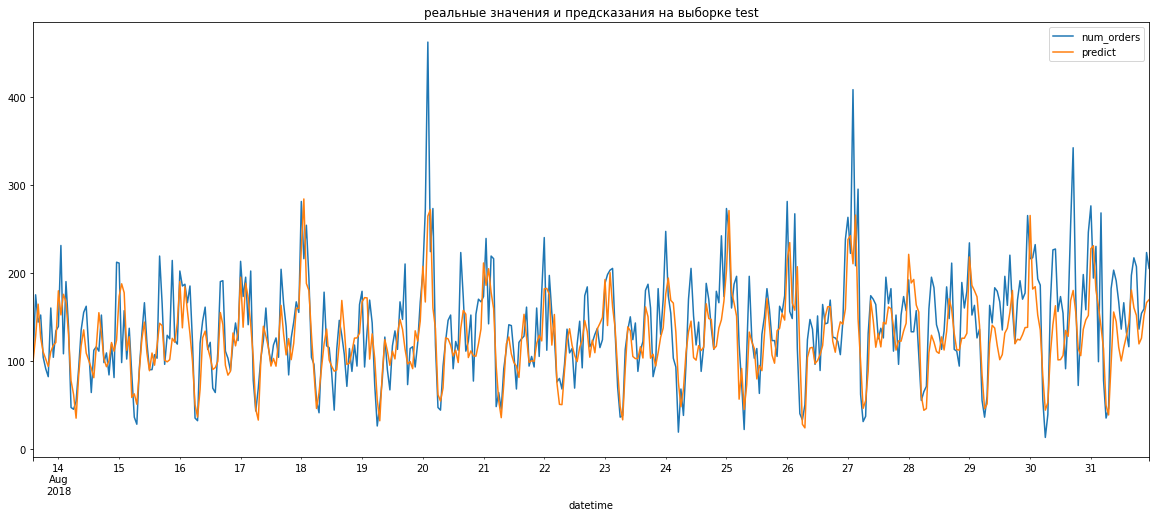

In [19]:
tt=pd.DataFrame(test['num_orders'])
tt['predict'] = predict_test
tt.plot(figsize=(20, 8), title='реальные значения и предсказания на выборке test');

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"><b>Excelent work - ✅ 2</b><br>Супер, отличная демонстрация корректной работы модели!</div> <br>

## Выводы
* На стадии подготовки данных:
    * произведен анализ на пропуски и дубликаты
    * Произведено ресемпликсирование
    * Добавлены дополнительные параметры
* На стадии анализа данных:
    * Была выявлена ярко выраженная суточная зависимость
* На стадии обучения:
    * было рассмотрено несколько моделей
    * была выбранна лучшая модель
* На стадии тестирования:
    * лучшая модель была протестирована на тестовых данных. Значение RMSE на тестовых данных для лучшей модели меньше 42

<hr style="border: 2px solid green;" />

## Common comments<br>

Спасибо за проделанную работу🤝<br>

Александр, проект выполнен хорошо, тебе удалось построить качественный пайплайн и подготовить ML модель соответствующую требованиям заказчика👍

Есть некоторые доработки:
- при первичном обзоре данных вывести несколько строк
- прокомментировать выбор кол-ва лагов и ширины скол среднего
- скорректировать анализ сезонной декомпозиции
- дать комментарии по процессу обучения некоторых моделей
- построить график прогноз-факт


Исправляй и отправляй на проверку🛠

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48